In [1]:
## Load libraries

import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as stats

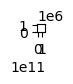

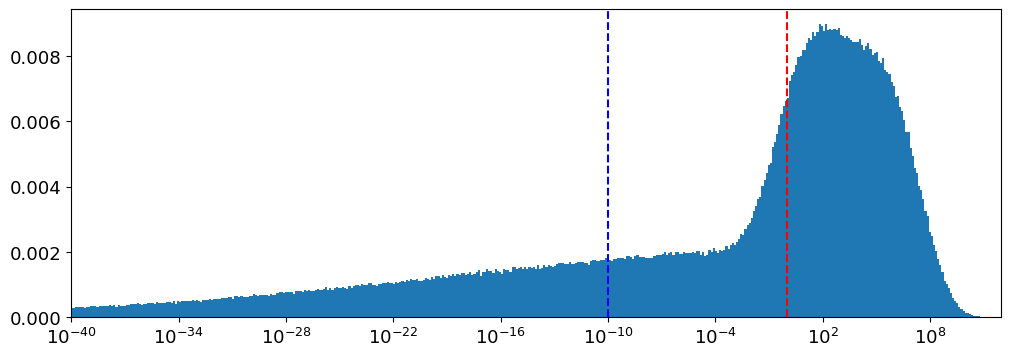

mean number of civilisations in milky way: 2.71e+07
median number of civilisations in milky way: 2.29
probability Earth is alone in the milky way: 47.827
probability Earth is alone in the universe: 26.242


In [2]:
## Original model in paper

#define loop variables
n_trials = 10**6
N_storage = np.zeros(n_trials)
i=0

#draw parameters from distribution
for trial in N_storage:
    R = 10 ** random.uniform(0,2)
    fp = 10 ** random.uniform(-1,0)
    ne = 10 ** random.uniform(-1,0)
    param = random.lognormvariate(1,50) #critical fl parameter
    if param < 10**-10: #needed to avoid getting 0 rounding errors
        fl = param
    else:
        fl = 1 - np.exp(-param)
    fi = 10 ** random.uniform(-3,0)
    fc = 10 ** random.uniform(-2,0)
    L = 10 ** random.uniform(2,10)
    
    N = R*fp*ne*fl*fi*fc*L #calculate fermi estimate for given values
    N_storage[i]= N #store estimate
    i=i+1
    
#get linear bins to use for log bins definition
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(0.1,0.1))
_, bins, _ = ax.hist(N_storage, bins=1000)

#plot in log form
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins)) #define log bins
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,4))
ax.hist(N_storage, bins=logbins, weights=np.zeros_like(N_storage)+1./n_trials)
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
plt.axvline(x=10**-10, color='blue', linestyle='--') #line for alone in universe
plt.axvline(x=10**0, color='red', linestyle='--') #line for alone in Milky Way
plt.xscale('log')
plt.xlim(10**(-40), 10**12)
plt.show()

#print results
p_Earth_alone_in_MW = stats.percentileofscore(N_storage, 1, kind='rank')
p_Earth_alone_in_U = stats.percentileofscore(N_storage, 10**-10, kind='rank')
print('mean number of civilisations in milky way: {:.2e}'.format(np.mean(N_storage)))
print('median number of civilisations in milky way: {:.2f}'.format(np.median(N_storage)))
print('probability Earth is alone in the milky way: {:.3f}'.format(p_Earth_alone_in_MW))
print('probability Earth is alone in the universe: {:.3f}'.format(p_Earth_alone_in_U))

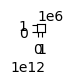

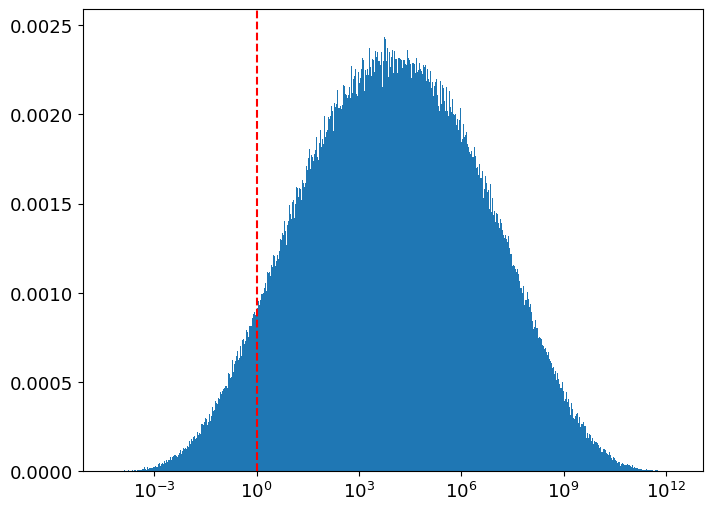

mean number of civilisations in milky way: 3.17e+08
median number of civilisations in milky way: 9995.57
probability Earth is alone in the milky way: 6.221
probability Earth is alone in the universe: 0.000


In [4]:
## My preferred model

#define loop variables
n_trials = 10**6
N_storage = np.zeros(n_trials)
i=0

#draw parameters from distribution
for trial in N_storage:
    R = 10 ** random.uniform(0,1)
    fp = 1
    ne = 10 ** random.uniform(-1,2)
    fl = 10 ** random.uniform(-2,0)
    fi = 10 ** random.uniform(-4,0)
    fc = 10 ** random.uniform(-1,0)
    L = 10 ** random.uniform(3,10)
    
    N = R*fp*ne*fl*fi*fc*L #calculate fermi estimate for given values
    N_storage[i]= N #store estimate
    i=i+1
    
#get linear bins to use for log bins definition
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(0.1,0.1))
_, bins, _ = ax.hist(N_storage, bins=1000) 

#plot in log form
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins)) #define log bins
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(8,6))
ax.hist(N_storage, bins=logbins, weights=np.zeros_like(N_storage)+1./n_trials)
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
plt.axvline(x=10**-10, color='blue', linestyle='--')
plt.axvline(x=10**0, color='red', linestyle='--')
plt.xscale('log')
plt.show()

#print results
p_Earth_alone_in_MW = stats.percentileofscore(N_storage, 1, kind='rank')
p_Earth_alone_in_U = stats.percentileofscore(N_storage, 10**-10, kind='rank')
print('mean number of civilisations in milky way: {:.2e}'.format(np.mean(N_storage)))
print('median number of civilisations in milky way: {:.2f}'.format(np.median(N_storage)))
print('probability Earth is alone in the milky way: {:.3f}'.format(p_Earth_alone_in_MW))
print('probability Earth is alone in the universe: {:.3f}'.format(p_Earth_alone_in_U))